Isaac Reyes

***2 Hands On: Data Quality and Pre-Processing***

***1. Assessing Data Quality***

**Load the following packages: dplyr, na.tools, tidyimpute (version from github decisionpatterns/tidyimpute”)**

*Load the car Insurance data set about the insurance risk rating of cars based on several characteristics of each car*

In [3]:
install.packages("dplyr")
install.packages("na.tools")
install.packages("remotes")  # Required for installing packages from GitHub
remotes::install_github("decisionpatterns/tidyimpute", force=TRUE)

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\pc\AppData\Local\R\win-library\4.3\00LOCK\dplyr\libs\x64\dplyr.dll  a C:\Users\pc\AppData\Local\R\win-library\4.3\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'na.tools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'remotes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\remotes65029d979fe\decisionpatterns-tidyimpute-9e07748/DESCRIPTION' ... OK
* preparing 'tidyimpute':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building 'tidyimpute_0.2.0.tar.gz'



Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



In [4]:
library(dplyr)
library(na.tools)
library(tidyimpute)
#cargamos librerias


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
# Instalar paquete devtools
install.packages("devtools")

#Instalar paquete necesario para dplyr
install.packages('lifecycle')

library(devtools)

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'lifecycle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


Loading required package: usethis



In [6]:
install.packages("readr") #en caso de necesitar instalar
library(readr)
# Cargar el archivo imports-85.data
data <- read.csv("/Users/pc/Desktop/Universidad/6 semestre/Machine Learning & Data Mining/Deberes/2 Hands On Data Quality and Pre-Processing/data/imports-85.data")



Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\pc\AppData\Local\R\win-library\4.3\00LOCK\readr\libs\x64\readr.dll  a C:\Users\pc\AppData\Local\R\win-library\4.3\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"



The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


In [7]:
head(df) #imprimimos los valores columnas para cambiar nombres

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

(a) Check if there are any missing values.

In [8]:
# Vector de nombres de las columnas
names <- c("symboling", "normalized-losses", "make", 
             "fuel-type", "aspiration", "num-of-doors", 
             "body-style", "drive-wheels", "engine-location",
            "wheel-base", "length", "width", "height", "curb-weight",
            "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
            "bore", "stroke", "compression-ratio", "horsepower",
            "peak-rpm", "city-mpg", "highway-mpg", "price")  # Agrega los nombres deseados para cada columna

# Asignar los nombres a las columnas del dataframe
colnames(data) <- names

head(data)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [9]:
anyNA(data)

[1] FALSE

(b) Count the number of cases that have, at least, one missing value.

In [10]:
library(magrittr) #pipe R

In [11]:
# Check for missing values
missing_values <- data %>% 
  summarise(any_missing = any_na(.))
#USAMOS EL TIP DE ANY_NA DEL PDF
# Print the result
print(missing_values)


  any_missing
1       FALSE


In [12]:
missing_values <- any_na(data) #usamos el tip, y cargamos de ahi para imprimir
print(missing_values)

[1] FALSE


In [13]:
missing_values <-colSums(is.na(data)) #contar valores nulos por columna
#imprimir nulos por columna
print(missing_values)

        symboling normalized-losses              make         fuel-type 
                0                 0                 0                 0 
       aspiration      num-of-doors        body-style      drive-wheels 
                0                 0                 0                 0 
  engine-location        wheel-base            length             width 
                0                 0                 0                 0 
           height       curb-weight       engine-type  num-of-cylinders 
                0                 0                 0                 0 
      engine-size       fuel-system              bore            stroke 
                0                 0                 0                 0 
compression-ratio        horsepower          peak-rpm          city-mpg 
                0                 0                 0                 0 
      highway-mpg             price 
                0                 0 


***NO HAY VALORES NULOS, SOLO ?, CONTAR ESOS VALORES***

In [14]:
# Contar valores iguales a "?" por columna
nulos <- colSums(data == "?", na.rm = FALSE)

# Imprimir los valores iguales a "?" por columna
print(nulos)


        symboling normalized-losses              make         fuel-type 
                0                40                 0                 0 
       aspiration      num-of-doors        body-style      drive-wheels 
                0                 2                 0                 0 
  engine-location        wheel-base            length             width 
                0                 0                 0                 0 
           height       curb-weight       engine-type  num-of-cylinders 
                0                 0                 0                 0 
      engine-size       fuel-system              bore            stroke 
                0                 0                 4                 4 
compression-ratio        horsepower          peak-rpm          city-mpg 
                0                 2                 2                 0 
      highway-mpg             price 
                0                 4 


(c) Create a new data set by removing all the cases that have missing values.

use drop_rows_any_na()

In [15]:
# Create a new dataset without missing values

#ES DECIR SIN FILAS QUE TENGAN ?
new_data <- data[!(apply(data, 1, function(x) any(x == "?"))), ]

# Print the new dataset
head(new_data)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


(d) Create a new data set by imputing all the missing values with 0.

In [16]:
library(imputeTS)
#Use function impute()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'imputeTS'


The following objects are masked from 'package:na.tools':

    na.mean, na.replace




In [17]:
new_data_1 <- impute(data, method = "interpolation", values = c("0"))
print(new_data_1)

    symboling normalized-losses          make fuel-type aspiration num-of-doors
1           3                 ?   alfa-romero       gas        std          two
2           1                 ?   alfa-romero       gas        std          two
3           2               164          audi       gas        std         four
4           2               164          audi       gas        std         four
5           2                 ?          audi       gas        std          two
6           1               158          audi       gas        std         four
7           1                 ?          audi       gas        std         four
8           1               158          audi       gas      turbo         four
9           0                 ?          audi       gas      turbo          two
10          2               192           bmw       gas        std          two
11          0               192           bmw       gas        std         four
12          0               188         

In [18]:
#Usamos ? por 0
newdata <- replace(data, data == "?", 0)
head(newdata)
#Hacer columnas factor a caracteres, hay columans factor
data_caracteres <- as.data.frame(lapply(data, as.character), stringsAsFactors = FALSE)
#? a 0
newdatad <- replace(data_caracteres, data_caracteres == "?", 0)
# imprimir 
head(newdatad)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


(e) Create a new data set by imputing the mean in all the columns which have double type values.


In [19]:
#columnas factor a caracteres
data_caracteres <- as.data.frame(lapply(data, as.character), stringsAsFactors = FALSE)
#? por 0 en el data
ndata <- replace(data_caracteres, data_caracteres == "?", '')
# Imprimir
head(ndata)


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3,,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
5,2,,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [20]:
str(ndata)

'data.frame':	204 obs. of  26 variables:
 $ symboling        : chr  "3" "1" "2" "2" ...
 $ normalized.losses: chr  "" "" "164" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "four" "four" ...
 $ body.style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : chr  "88.6" "94.5" "99.8" "99.4" ...
 $ length           : chr  "168.8" "171.2" "176.6" "176.6" ...
 $ width            : chr  "64.1" "65.5" "66.2" "66.4" ...
 $ height           : chr  "48.8" "52.4" "54.3" "54.3" ...
 $ curb.weight      : chr  "2548" "2823" "2337" "2824" ...
 $ engine.type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num.of.cylinders : chr  "four" "six" "four" "five" ...
 $ engine.size    

In [39]:
ndata$symboling <- as.numeric(ndata$symboling)
ndata$normalized.losses <- as.numeric(ndata$normalized.losses)
ndata$wheel.base <- as.numeric(ndata$wheel.base)
ndata$length <- as.numeric(ndata$length)
ndata$width <- as.numeric(ndata$width)
ndata$height <- as.numeric(ndata$height)
ndata$curb.weight <- as.numeric(ndata$curb.weight)
ndata$engine.size <- as.numeric(ndata$engine.size)
ndata$bore <- as.numeric(ndata$bore)
ndata$stroke <- as.numeric(ndata$stroke)
ndata$compression.ratio <- as.numeric(ndata$compression.ratio)
ndata$horsepower <- as.numeric(ndata$horsepower)
ndata$peak.rpm <- as.numeric(ndata$peak.rpm)
ndata$city.mpg <- as.numeric(ndata$city.mpg)
ndata$highway.mpg <- as.numeric(ndata$highway.mpg)
ndata$price <- as.numeric(ndata$price)
str(ndata)

'data.frame':	204 obs. of  26 variables:
 $ symboling        : num  3 1 2 2 2 1 1 1 0 2 ...
 $ normalized.losses: num  NA NA 164 164 NA 158 NA 158 NA 192 ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "four" "four" ...
 $ body.style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 94.5 99.8 99.4 99.8 ...
 $ length           : num  169 171 177 177 177 ...
 $ width            : num  64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 64.8 ...
 $ height           : num  48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 54.3 ...
 $ curb.weight      : num  2548 2823 2337 2824 2507 ...
 $ engine.type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num.of.cylinders : chr  "fou

In [42]:
#columnas numéricas
colnum <- sapply(ndata, is.numeric)

#Calcular media de c/c numérica
meds <- sapply(ndata[, colnum], mean, na.rm = TRUE)

# NA ->media n
data_imputada1 <- ndata
data_imputada1[, colnum] <- lapply(data_imputada1[, colnum], function(x) {
  is_na <- is.na(x)
  x[is_na] <- meds[is_na]
  return(x)
})
#1dataframeimputado
head(data_imputada1)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0.8235294,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0000000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0000000,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0000000,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,65.9166667,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158.0000000,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


(f) Create a new data set by imputing the mode in all the columns which have integer type values.

In [43]:
#Moda
mode <- function(x) {
   return(as.numeric(names(which.max(table(x)))))
}


In [45]:
#repetimos lo mismo que en la anterior
colnum<- sapply(ndata, is.numeric)
# Na->col
data_imputado<-ndata
data_imputado[, colnum] <- lapply(data_imputado[, colnum], function(x) {
  is_na <- is.na(x)
  x[is_na] <- mode(x[!is_na])
  return(x)
})
#imprimir
head(data_imputado)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


(g) Create a new data set by imputing the most frequent value to the column ”nDoors”.

In [25]:
#USAR IMPUTE_REPLACE()
# Create a new dataset by imputing the most frequent value to "nDoors"
new_data_g <- impute_replace(data, target = "nDoors", method = "mode")
# Print the new dataset
print(new_data_g)
#NO SIRVE


NULL


In [46]:
df<-data_imputado
#moda del ultimo
moda<-as.character(names(which.max(table(df$num.of.doors))))
# Imprimir la moda
print(moda)

[1] "four"


In [47]:
# Convertir la columna a tipo factor
columna_factor <- as.factor(df$num.of.doors)
# Obtener todos los niveles de la columna factor
n <- levels(columna_factor)
# Imprimir los niveles
print(n)

[1] ""     "four" "two" 


In [48]:
# Reemplazar "?" por 0 en la columna "num.of.doors"
ndors<-replace(df$num.of.doors,df$num.of.doors == "", moda)
# Reamplazamos los valores de ndors en la matriz
df$num.of.doors <- ndors
# Convertir la columna a tipo factor
columna_factor <- as.factor(df$num.of.doors)

# Obtener todos los niveles de la columna factor
n <- levels(columna_factor)

# Imprimir los niveles
print(n)

[1] "four" "two" 


(h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?

In [51]:
# TIP USE DISTINCT AND COUNT
dfh<-df
dfh$normalized.losses<-data_imputada1$normalized.losses
head(dfh)
str(dfh)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0.8235294,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0000000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0000000,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0000000,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,65.9166667,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158.0000000,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


'data.frame':	204 obs. of  26 variables:
 $ symboling        : num  3 1 2 2 2 1 1 1 0 2 ...
 $ normalized.losses: num  0.824 122 164 164 65.917 ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "four" "four" ...
 $ body.style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 94.5 99.8 99.4 99.8 ...
 $ length           : num  169 171 177 177 177 ...
 $ width            : num  64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 64.8 ...
 $ height           : num  48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 54.3 ...
 $ curb.weight      : num  2548 2823 2337 2824 2507 ...
 $ engine.type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num.of.cylinders : chr  "four" "six" "

***2. Data Pre-Processing***

2. Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.

In [52]:
install.packages("dlookr")
install.packages("gdtools")


Warning message:
"package 'dlookr' is in use and will not be installed"
Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'gdtools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'gdtools'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\pc\AppData\Local\R\win-library\4.3\00LOCK\gdtools\libs\x64\gdtools.dll  a C:\Users\pc\AppData\Local\R\win-library\4.3\gdtools\libs\x64\gdtools.dll: Permission denied"
Warning message:
"restored 'gdtools'"



The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


In [53]:
library(dlookr)


(a) Apply range-based normalization and z-score normalization.


Tip: use the function transform().

In [54]:
data <- dfh
# Normalización basada en rango
dfh$price_range_normalized <- (dfh$price - min(dfh$price)) / (max(dfh$price) - min(dfh$price))

# Normalización z-score
dfh$price_zscore <- (dfh$price - mean(dfh$price)) / sd(dfh$price)
print(dfh[c("price_range_normalized", "price_zscore")])

    price_range_normalized price_zscore
1             0.2825579663   0.43270907
2             0.2825579663   0.43270907
3             0.2192542575   0.11232252
4             0.3061417010   0.55206876
5             0.2515267365   0.27565684
6             0.3125961968   0.58473562
7             0.3426344273   0.73676218
8             0.4656422223   1.35931721
9             0.0112705427  -0.94030433
10            0.2808202175   0.42391414
11            0.2931085845   0.48610682
12            0.3935256442   0.99432783
13            0.3968770170   1.01128947
14            0.4827714612   1.44601004
15            0.6365622362   2.22436088
16            0.8985899409   3.55050990
17            0.7884911375   2.99328859
18            0.0008192245  -0.99319952
19            0.0292190060  -0.84946532
20            0.0361700015  -0.81428562
21            0.0112705427  -0.94030433
22            0.0312546547  -0.83916270
23            0.0704781292  -0.64064868
24            0.0275805571  -0.85775768


(b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges.


Tip: use the function binning().

In [55]:
dfh <- data
# Discretización en 4 rangos de frecuencia iguales
dfh$price_equal_frequency <- cut(dfh$price, breaks = 4, labels = FALSE)

# Discretización en 4 rangos de ancho igual
dfh$price_equal_width <- cut(dfh$price, breaks = 4, labels = FALSE, include.lowest = TRUE)

print(dfh[c("price_equal_frequency", "price_equal_width")])

    price_equal_frequency price_equal_width
1                       2                 2
2                       2                 2
3                       1                 1
4                       2                 2
5                       2                 2
6                       2                 2
7                       2                 2
8                       2                 2
9                       1                 1
10                      2                 2
11                      2                 2
12                      2                 2
13                      2                 2
14                      2                 2
15                      3                 3
16                      4                 4
17                      4                 4
18                      1                 1
19                      1                 1
20                      1                 1
21                      1                 1
22                      1       

***3. With the seed 111019 obtain the following samples on the car insurance data set.***

TIP: USE SAMPLE_FRAC()

In [58]:
# Establecer la semilla
set.seed(111019)

(a) A random sample of 60% of the cases, with replacement

In [60]:
print("Filas del Data Frame inicial")
print(nrow(df))
df_a <- sample_frac(df, 0.6, replace = TRUE)

[1] "Filas del Data Frame inicial"
[1] 204


In [61]:
print("Muestra aleatoria del 60% de los casos con reemplazo:")
print(nrow(df_a))
head(df_a)

[1] "Muestra aleatoria del 60% de los casos con reemplazo:"
[1] 122


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,⋯,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
2,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,⋯,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
3,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,⋯,152,idi,3.70,3.52,21.0,95,4150,28,33,17950
4,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
5,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,⋯,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
6,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,⋯,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980


(b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute.

In [62]:
print("Inicio como la a (anterior)")
print(nrow(df))
# (b) Muestra estratificada del 60% de los casos de autos según el atributo fuelType
df_b <- df %>% 
    group_by(fuel.type) %>% 
        sample_frac(0.6, replace = FALSE)

[1] "Inicio como la a (anterior)"
[1] 204


In [63]:
print("A stratified sample of 60% of the cases of cars, according to the fuelType attribute.")
print(nrow(df_b))
head(df_b)

[1] "A stratified sample of 60% of the cases of cars, according to the fuelType attribute."
[1] 122


symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,⋯,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,⋯,97,idi,3.01,3.40,23.0,52,4800,37,46,7995
0,161,peugot,diesel,turbo,four,wagon,rwd,front,114.2,⋯,152,idi,3.70,3.52,21.0,95,4150,25,25,13860
2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,⋯,97,idi,3.01,3.40,23.0,52,4800,37,46,7775
0,161,peugot,diesel,turbo,four,wagon,rwd,front,114.2,⋯,152,idi,3.70,3.52,21.0,95,4150,25,25,17075
-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,⋯,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


(c) Use the table() function to inspect the distribution of values in each of the two samples above.

In [64]:
# (c) Inspeccionar la distribución de valores en cada una de las dos muestras
table_a <- table(df_a$fuel.type)
table_b <- table(df_b$fuel.type)
print("Table A")
print(table_a)
print("Table B")
print(table_b)

[1] "Table A"

diesel    gas 
    20    102 
[1] "Table B"

diesel    gas 
    12    110 


***4. Load the package corrplot and select the numeric attributes of the car insurance data set.***

In [65]:
#Instalamos la carpeta y la cargamos
install.packages("corrplot")
library(corrplot)

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages


corrplot 0.92 loaded



In [68]:
#NA contar
na_counts <- colSums(is.na(df))
# Mostrar los resultados
print(na_counts)

# Seleccionar solo las columnas numéricas del dataframe
numeric_columns <- df[sapply(df, is.numeric)]
# Calcular la media de cada columna numérica (ignorando los NA)
column_means <- colMeans(numeric_columns, na.rm = TRUE)
# Reemplazar los NA por la media de cada columna numérica
dataframe_replaced <- replace(numeric_columns, is.na(numeric_columns), column_means)
# Asignar los valores reemplazados al dataframe original
df[sapply(df, is.numeric)] <- dataframe_replaced
na_counts <- colSums(is.na(df))

        symboling normalized.losses              make         fuel.type 
                0                 0                 0                 0 
       aspiration      num.of.doors        body.style      drive.wheels 
                0                 0                 0                 0 
  engine.location        wheel.base            length             width 
                0                 0                 0                 0 
           height       curb.weight       engine.type  num.of.cylinders 
                0                 0                 0                 0 
      engine.size       fuel.system              bore            stroke 
                0                 0                 0                 0 
compression.ratio        horsepower          peak.rpm          city.mpg 
                0                 0                 0                 0 
      highway.mpg             price 
                0                 0 


(a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

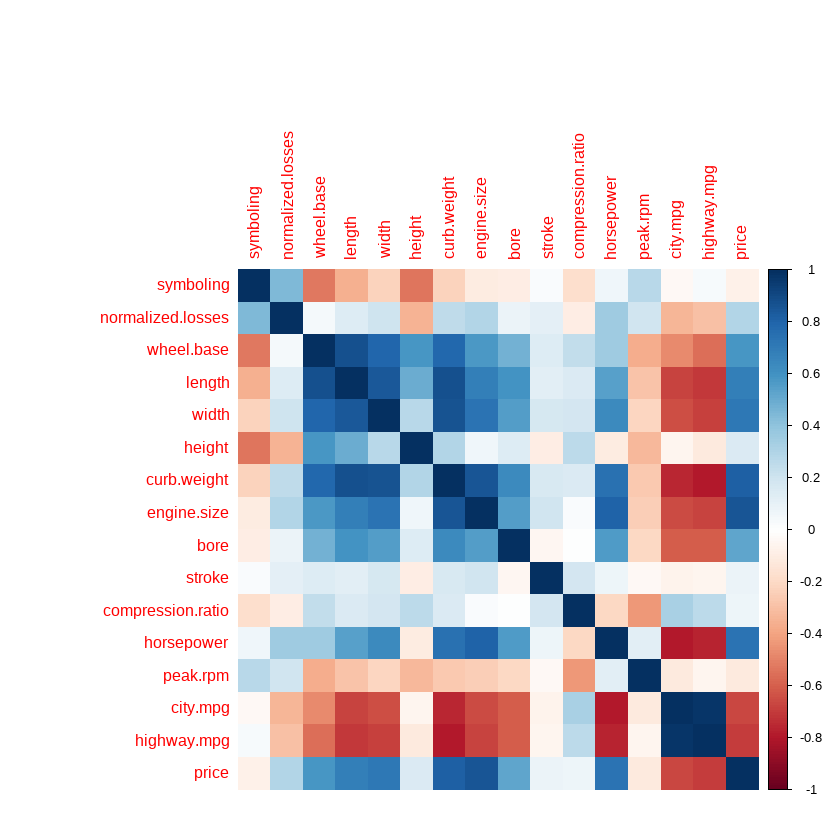

In [69]:
#Calcular el coeficiente de correlación de Pearson entre cada par de variables
cor_pearson <- cor(df[sapply(df, is.numeric)])
# Graficar la matriz de correlación
corrplot(cor_pearson, method = "color", type = "full")

(b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence
intervals of the correlation coefficient for each pair of variables.

In [70]:
# Calcular los valores p y los intervalos de confianza del coeficiente de correlación
cor_test <- cor.mtest(cor_pearson)
head(cor_test)

,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
symboling,0.000000e+00,0.03415409,1.400038e-03,1.656921e-02,5.074923e-02,1.684403e-06,7.333503e-02,2.035490e-01,1.505763e-01,0.8964456,0.0486212344,6.661273e-01,0.0039177584,4.972268e-01,3.561032e-01,1.988853e-01
normalized.losses,3.415409e-02,0.00000000,7.420196e-01,3.546287e-01,1.978951e-01,5.161168e-02,1.516572e-01,6.691563e-02,1.961943e-01,0.5677905,0.0320208469,1.157685e-02,0.1663833634,1.874637e-02,3.169944e-02,6.663763e-02
wheel.base,1.400038e-03,0.74201960,0.000000e+00,8.347568e-11,3.938148e-08,9.858549e-04,2.214815e-07,3.406195e-05,4.332339e-05,0.5445752,0.4898911357,2.732054e-03,0.0117223541,6.075175e-04,1.624591e-04,2.478880e-05
length,1.656921e-02,0.35462868,8.347568e-11,0.000000e+00,4.228656e-12,1.049997e-02,2.136907e-11,2.834977e-07,6.967799e-07,0.5622122,0.9055026195,8.936395e-05,0.0505773842,8.714013e-06,1.184649e-06,1.374048e-07
width,5.074923e-02,0.19789507,3.938148e-08,4.228656e-12,0.000000e+00,4.624272e-02,2.255335e-14,3.761594e-09,3.503426e-07,0.4597467,0.9539149525,7.469486e-06,0.0896625454,1.044765e-06,1.054933e-07,2.909038e-09
height,1.684403e-06,0.05161168,9.858549e-04,1.049997e-02,4.624272e-02,0.000000e+00,6.232533e-02,2.219049e-01,1.238996e-01,0.7646306,0.0569714793,6.791600e-01,0.0021791464,4.048009e-01,2.821599e-01,1.819115e-01
curb.weight,7.333503e-02,0.15165715,2.214815e-07,2.136907e-11,2.255335e-14,6.232533e-02,0.000000e+00,6.647057e-11,6.934236e-08,0.4815363,0.8423747054,1.342373e-06,0.1072593981,1.697082e-07,1.084777e-08,5.027064e-11
engine.size,2.035490e-01,0.06691563,3.406195e-05,2.834977e-07,3.761594e-09,2.219049e-01,6.647057e-11,0.000000e+00,3.908219e-07,0.4258894,0.5793837309,1.886168e-08,0.1933881651,5.682968e-08,9.035392e-09,3.020608e-13
bore,1.505763e-01,0.19619433,4.332339e-05,6.967799e-07,3.503426e-07,1.238996e-01,6.934236e-08,3.908219e-07,0.000000e+00,0.8593087,0.5971059897,4.042030e-06,0.1609952477,7.784108e-07,2.394160e-07,3.919888e-07
stroke,8.964456e-01,0.56779048,5.445752e-01,5.622122e-01,4.597467e-01,7.646306e-01,4.815363e-01,4.258894e-01,8.593087e-01,0.0000000,0.5891952813,6.030792e-01,0.6554233174,5.982523e-01,5.852441e-01,5.757831e-01


(c) Plot the all correlation information using the function corrplot. Explore some of its parameters

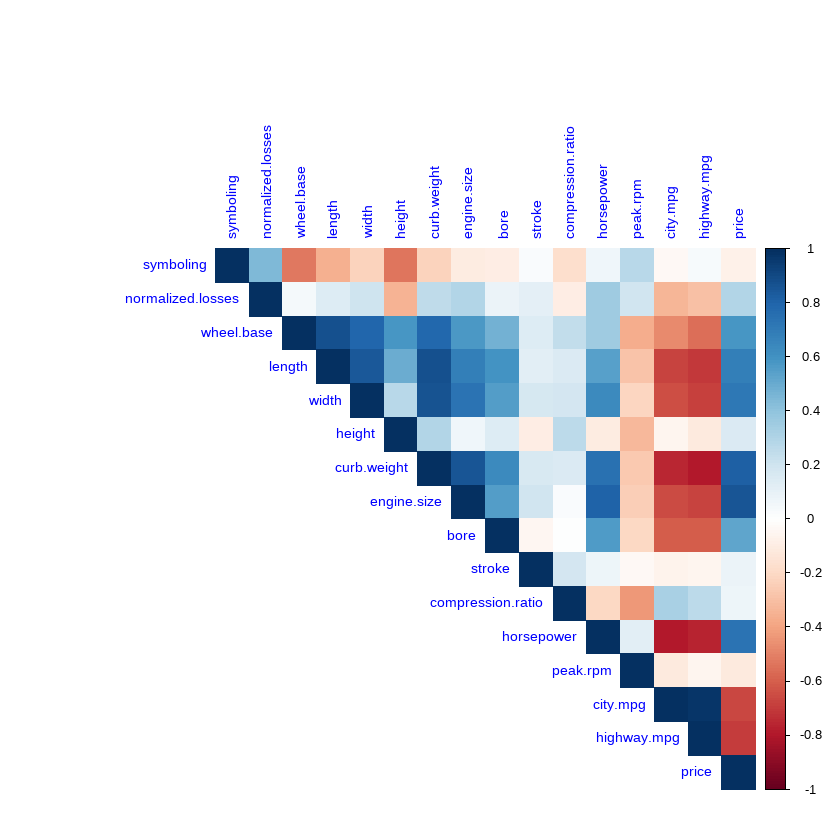

In [71]:
corrplot(cor_pearson, method = "color", type = "upper", tl.cex = 0.9, tl.col = "blue")

****5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state
judges in the US Superior Court regarding a set of attributes.****

In [72]:
# Cargar el paquete datasets
library(datasets)
# Cargar el conjunto de datos USJudgeRatings
data(USJudgeRatings)

(a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is
obtained by the linear combination of each component.

In [73]:
summary(USJudgeRatings)

      CONT             INTG            DMNR            DILG      
 Min.   : 5.700   Min.   :5.900   Min.   :4.300   Min.   :5.100  
 1st Qu.: 6.850   1st Qu.:7.550   1st Qu.:6.900   1st Qu.:7.150  
 Median : 7.300   Median :8.100   Median :7.700   Median :7.800  
 Mean   : 7.437   Mean   :8.021   Mean   :7.516   Mean   :7.693  
 3rd Qu.: 7.900   3rd Qu.:8.550   3rd Qu.:8.350   3rd Qu.:8.450  
 Max.   :10.600   Max.   :9.200   Max.   :9.000   Max.   :9.000  
      CFMG            DECI            PREP            FAMI      
 Min.   :5.400   Min.   :5.700   Min.   :4.800   Min.   :5.100  
 1st Qu.:7.000   1st Qu.:7.100   1st Qu.:6.900   1st Qu.:6.950  
 Median :7.600   Median :7.700   Median :7.700   Median :7.600  
 Mean   :7.479   Mean   :7.565   Mean   :7.467   Mean   :7.488  
 3rd Qu.:8.050   3rd Qu.:8.150   3rd Qu.:8.200   3rd Qu.:8.250  
 Max.   :8.700   Max.   :8.800   Max.   :9.100   Max.   :9.100  
      ORAL            WRIT            PHYS            RTEN      
 Min.   :4.700   M

In [74]:
#Analizar
p <- prcomp(USJudgeRatings, scale. = TRUE)
summary(p)
length(USJudgeRatings)
length(p)
head(p)
head(USJudgeRatings)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1833 1.05078 0.57698 0.50383 0.29061 0.19310 0.14030
Proportion of Variance 0.8445 0.09201 0.02774 0.02115 0.00704 0.00311 0.00164
Cumulative Proportion  0.8445 0.93647 0.96421 0.98537 0.99240 0.99551 0.99715
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.12416 0.08851 0.07491 0.05708 0.04539
Proportion of Variance 0.00128 0.00065 0.00047 0.00027 0.00017
Cumulative Proportion  0.99844 0.99909 0.99956 0.99983 1.00000

[1] 12

[1] 5

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
CONT,0.003075143,0.932890644,-0.334756548,0.058576867,0.093438368,-0.004064432,-0.005214784,6.006597e-02,-0.02514533,0.03038881,-0.0145329260,0.007940919
INTG,-0.288550775,-0.182040993,-0.549360126,0.173977074,-0.014543880,0.369937339,0.449810741,-3.341645e-01,-0.27537794,-0.10897641,0.1125535650,-0.009848658
DMNR,-0.286884206,-0.197565743,-0.556490386,-0.124412022,-0.228832817,-0.394724667,-0.466747889,2.470974e-01,-0.19910004,0.07241282,-0.1343234234,-0.059121657
DILG,-0.304354091,0.036304667,0.163629910,0.321395544,-0.301936920,0.598676072,-0.209710731,3.548587e-01,0.03977180,0.38339165,-0.0709517642,-0.053790339
CFMG,-0.302572733,0.168393523,0.207341904,0.012949223,-0.448430522,-0.085728870,-0.246903359,-7.135261e-01,0.14342471,-0.09850310,-0.1658680927,-0.025082947
DECI,-0.301891969,0.127877299,0.297902771,0.030491779,-0.424003128,-0.392609484,0.536429933,3.024227e-01,-0.25823773,-0.06743847,0.1284999526,-0.044141604
PREP,-0.309406446,0.032230248,0.151869345,0.213656069,0.202853400,0.083216652,-0.335390036,1.536754e-01,-0.10876864,-0.67986284,0.3187612119,0.273286884
FAMI,-0.306679527,-0.001315183,0.195290454,0.200651140,0.507470003,-0.101538704,0.036378004,-2.038889e-02,-0.22306628,-0.04004599,-0.5733628652,-0.421739844
ORAL,-0.312708348,-0.003625720,0.002150634,-0.007441042,0.246059421,-0.150272440,-0.057580177,-9.062990e-02,0.29951714,0.25599455,0.6386061655,-0.494391025
WRIT,-0.311061231,-0.031378756,0.056045596,0.137104995,0.305562842,-0.238172386,0.060899994,-1.261203e-01,0.02497324,0.47478254,-0.0004056397,0.696107204


,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


(b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can
label each point with the lawyer’s name by setting the labels parameter.

plyr (NA -> 1.8.8) [CRAN]


Installing 1 packages: plyr

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\pc\AppData\Local\Temp\Rtmp0OfZ9t\remotes65015df4738\vqv-ggbiplot-7325e88/DESCRIPTION' ... OK
* preparing 'ggbiplot':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a 'data/datalist' file should be added
* building 'ggbiplot_0.55.tar.gz'



Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

Loading required package: ggplot2

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor


Loading required package: grid



Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1833 1.05078 0.57698 0.50383 0.29061 0.19310 0.14030
Proportion of Variance 0.8445 0.09201 0.02774 0.02115 0.00704 0.00311 0.00164
Cumulative Proportion  0.8445 0.93647 0.96421 0.98537 0.99240 0.99551 0.99715
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.12416 0.08851 0.07491 0.05708 0.04539
Proportion of Variance 0.00128 0.00065 0.00047 0.00027 0.00017
Cumulative Proportion  0.99844 0.99909 0.99956 0.99983 1.00000

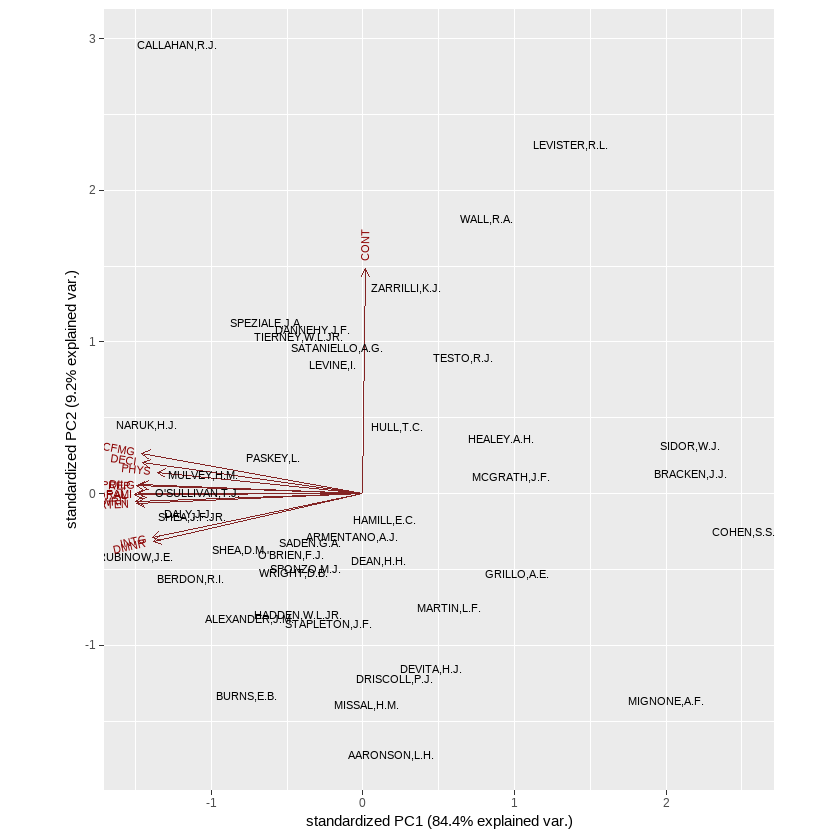

In [76]:
# Instalar el paquete ggbiplot desde GitHub
devtools::install_github("vqv/ggbiplot")

# Cargar el paquete ggbiplot
library(ggbiplot)

# Obtener los componentes principales
p <- prcomp(USJudgeRatings, scale. = TRUE)
summary(p)

# Plot de los dos primeros componentes
ggbiplot(p, labels = rownames(USJudgeRatings))


      CONT             INTG            DMNR            DILG      
 Min.   : 5.700   Min.   :5.900   Min.   :4.300   Min.   :5.100  
 1st Qu.: 6.850   1st Qu.:7.550   1st Qu.:6.900   1st Qu.:7.150  
 Median : 7.300   Median :8.100   Median :7.700   Median :7.800  
 Mean   : 7.437   Mean   :8.021   Mean   :7.516   Mean   :7.693  
 3rd Qu.: 7.900   3rd Qu.:8.550   3rd Qu.:8.350   3rd Qu.:8.450  
 Max.   :10.600   Max.   :9.200   Max.   :9.000   Max.   :9.000  
      CFMG            DECI            PREP            FAMI      
 Min.   :5.400   Min.   :5.700   Min.   :4.800   Min.   :5.100  
 1st Qu.:7.000   1st Qu.:7.100   1st Qu.:6.900   1st Qu.:6.950  
 Median :7.600   Median :7.700   Median :7.700   Median :7.600  
 Mean   :7.479   Mean   :7.565   Mean   :7.467   Mean   :7.488  
 3rd Qu.:8.050   3rd Qu.:8.150   3rd Qu.:8.200   3rd Qu.:8.250  
 Max.   :8.700   Max.   :8.800   Max.   :9.100   Max.   :9.100  
      ORAL            WRIT            PHYS            RTEN      
 Min.   :4.700   M

Warning message:
"package 'ggbiplot' is in use and will not be installed"


Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1833 1.05078 0.57698 0.50383 0.29061 0.19310 0.14030
Proportion of Variance 0.8445 0.09201 0.02774 0.02115 0.00704 0.00311 0.00164
Cumulative Proportion  0.8445 0.93647 0.96421 0.98537 0.99240 0.99551 0.99715
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.12416 0.08851 0.07491 0.05708 0.04539
Proportion of Variance 0.00128 0.00065 0.00047 0.00027 0.00017
Cumulative Proportion  0.99844 0.99909 0.99956 0.99983 1.00000

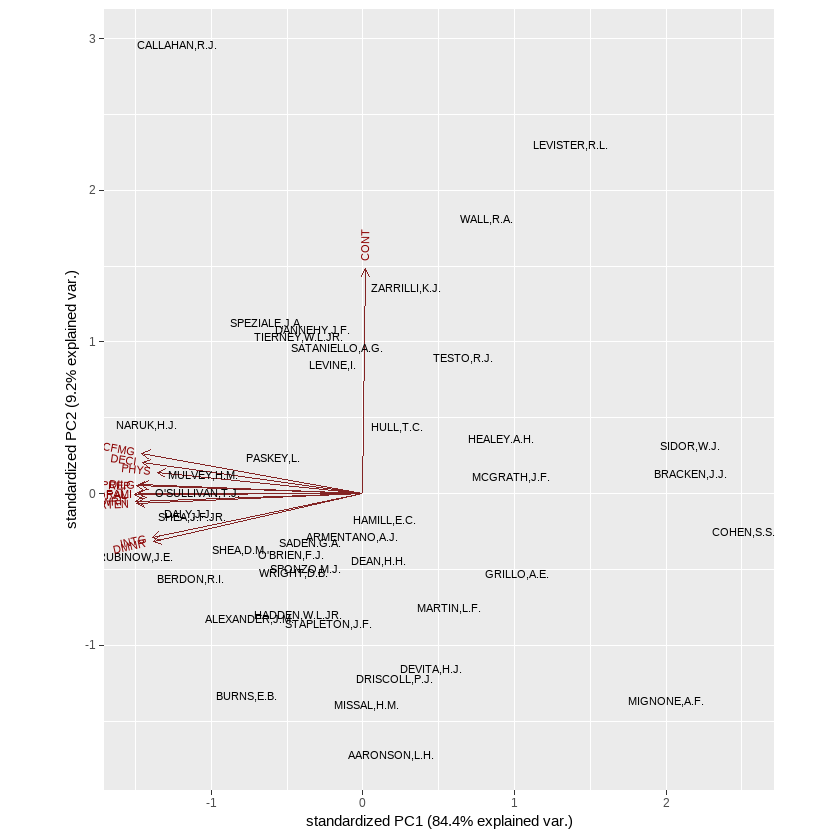

In [78]:
#MISMO RESULTADO:


# Cargar el paquete datasets
library(datasets)
# Cargar el conjunto de datos USJudgeRatings
data(USJudgeRatings)
summary(USJudgeRatings)

# Cargar el paquete ggbiplot
install.packages("ggbiplot")
library(ggbiplot)

# Obtener los componentes principales
p <- prcomp(USJudgeRatings, scale. = TRUE)
summary(p)

# Plot de los dos primeros componentes
ggbiplot(p, labels = rownames(USJudgeRatings))
